In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.25, random_state=42)

print(f'Train X:{x_train.shape}, Y:{y_train.shape}')
print(f'Validation X:{x_validation.shape}, Y:{y_validation.shape}')
print(f'Test X:{x_test.shape}, Y:{y_test.shape}')

Train X:(50000, 32, 32, 3), Y:(50000, 1)
Validation X:(2500, 32, 32, 3), Y:(2500, 1)
Test X:(7500, 32, 32, 3), Y:(7500, 1)


In [10]:
x_train, x_test, x_validation = x_train / 255.0, x_test / 255.0, x_validation / 255.0

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),

    tf.keras.layers.Conv2D(25, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(30, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(30, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(30, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [13]:
train_result = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 86ms/step - accuracy: 0.2748 - loss: 1.9249 - val_accuracy: 0.4768 - val_loss: 1.4292
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 86ms/step - accuracy: 0.5218 - loss: 1.3324 - val_accuracy: 0.5704 - val_loss: 1.2057
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 85ms/step - accuracy: 0.5896 - loss: 1.1478 - val_accuracy: 0.5904 - val_loss: 1.1614
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 86ms/step - accuracy: 0.6229 - loss: 1.0568 - val_accuracy: 0.6304 - val_loss: 1.0556
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 86ms/step - accuracy: 0.6522 - loss: 0.9894 - val_accuracy: 0.6320 - val_loss: 1.0346
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 84ms/step - accuracy: 0.6681 - loss: 0.9333 - val_accuracy: 0.6412 - val_loss: 1.0087
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 85ms/step - accuracy: 0.6855 - loss: 0.8823 - val_accuracy: 0.6668 - val_loss: 0.9424
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 84ms/step - accuracy: 

In [14]:
test_result = model.evaluate(x_test, y_test)

235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6806 - loss: 0.9327


In [15]:
test_result

[0.9192801713943481, 0.6830666661262512]

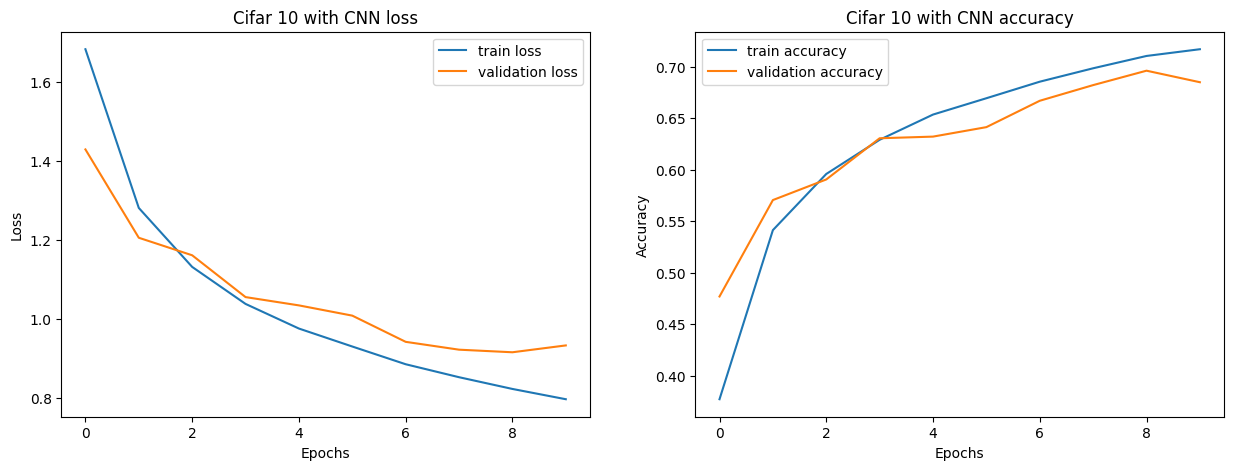

In [16]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 5))

ax_1.plot(train_result.history['loss'], label='train loss')
ax_1.plot(train_result.history['val_loss'], label='validation loss')
ax_1.legend()
ax_1.set_title('Cifar 10 with CNN loss')
ax_1.set_xlabel('Epochs')
ax_1.set_ylabel('Loss')

ax_2.plot(train_result.history['accuracy'], label='train accuracy')
ax_2.plot(train_result.history['val_accuracy'], label='validation accuracy')
ax_2.legend()
ax_2.set_title('Cifar 10 with CNN accuracy')
ax_2.set_xlabel('Epochs')
ax_2.set_ylabel('Accuracy')

plt.show()